In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn import svm
import joblib

In [2]:
file = 'data.csv'
df = pd.read_csv(file)
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Features Engineering

In [3]:
df.shape

(699, 11)

In [4]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [6]:
df[df.values == 0]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class


In [7]:
df[df['Class'].values ==2].count()

ID             458
Clump          458
UnifSize       458
UnifShape      458
MargAdh        458
SingEpiSize    458
BareNuc        458
BlandChrom     458
NormNucl       458
Mit            458
Class          458
dtype: int64

In [8]:
df[df.Class.values ==4].count()

ID             241
Clump          241
UnifSize       241
UnifShape      241
MargAdh        241
SingEpiSize    241
BareNuc        241
BlandChrom     241
NormNucl       241
Mit            241
Class          241
dtype: int64

In [9]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
df['BareNuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [11]:
df[df['BareNuc'] == '?']

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


## Converting the "BareNuc" column that has a "?" into a value

In [12]:
df['BareNuc'] = df['BareNuc'].replace('?', 0).astype(int)
mean = np.mean(df['BareNuc'])
df['BareNuc'] = df['BareNuc'].replace(0, mean)


In [13]:
df['BareNuc'] = df['BareNuc'].astype(int)

In [14]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## Selecting Features and target variable

In [17]:
X = df.drop(['ID', 'Class'], axis=1)

In [18]:
y = df['Class']

# EXPLORATION DATA ANALYSIS

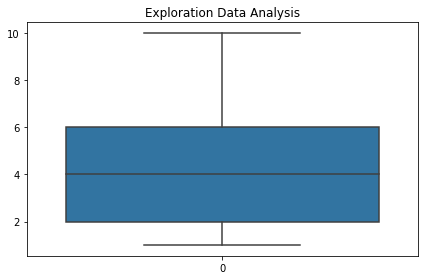

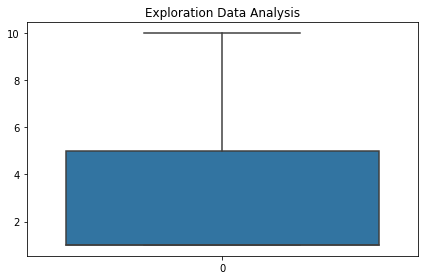

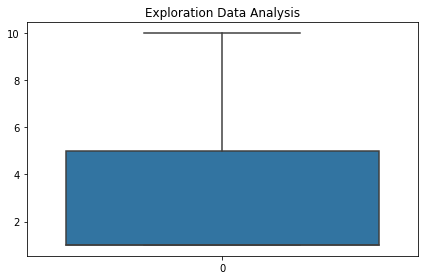

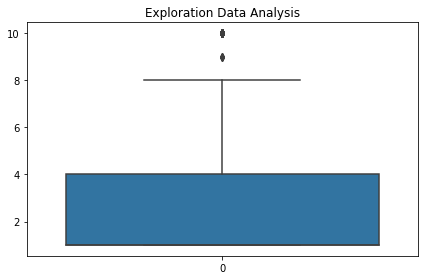

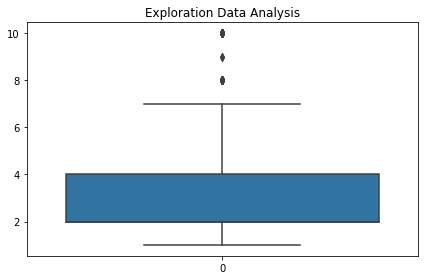

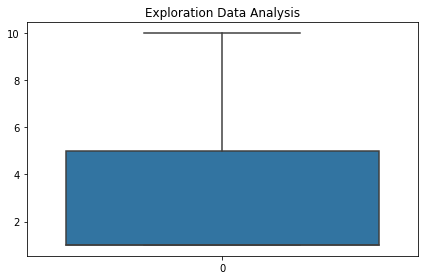

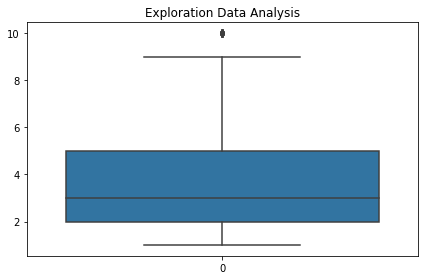

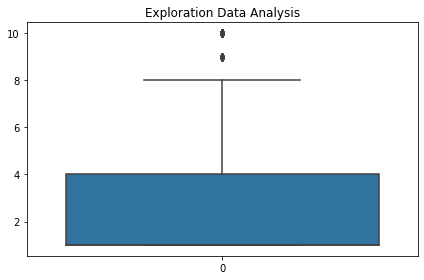

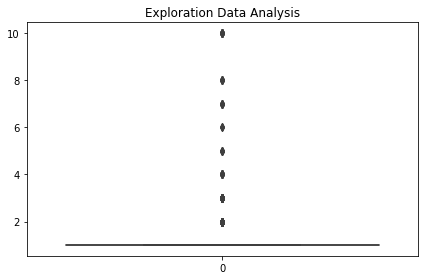

In [24]:
for data in X.columns:
    sns.boxplot(data=X[data])
    plt.title('Exploration Data Analysis')
    plt.tight_layout()
    plt.show()

## Standard Scaling the Features

In [30]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## Splitting The Data 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [32]:
X_train.shape, X_test.shape

((524, 9), (175, 9))

## Building The Model For Making Predictions

In [43]:
model = svm.SVC(C=2, kernel='linear', gamma='auto')

In [44]:
model.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

## Checking The Accuracy Of The Model ON The Training Set

In [49]:
X_train_predict = model_pca.predict(X_train)

In [50]:
accuracy_score(X_train_predict, y_train)*100

97.13740458015268

In [53]:
cft = confusion_matrix(X_train_predict, y_train)

In [54]:
cft

array([[330,   5],
       [ 10, 179]], dtype=int64)

## Checking The Accuracy Of The Model ON The Testing Set

In [57]:
X_test_predict = model_pca.predict(X_test)

In [58]:
accuracy_score(X_test_predict, y_test)

0.96

In [59]:
cf = confusion_matrix(X_test_predict, y_test)

In [60]:
cf

array([[116,   5],
       [  2,  52]], dtype=int64)

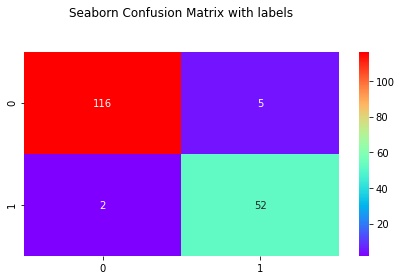

In [61]:
ax = sns.heatmap(cf, annot=True, fmt='', cmap='rainbow')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');

## Display the visualization of the Confusion Matrix.
plt.tight_layout()
plt.show()

## Saving The Model Into a File

In [63]:
joblib.dump(model, 'Cancer_detection.pkl')

['Cancer_detection.pkl']

In [64]:
joblib.load('Cancer_detection.pkl')

SVC(C=2, gamma='auto', kernel='linear')